##
This project is about classifying a tweet whether it is related to disaster or not.I have use Bag of words model(Natural Language processing) and Naive Bais Classifier to classify the tweets.

In [2]:
#Importing libraries
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from collections import defaultdict
from collections import  Counter
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_set = pd.read_csv('E:/Spring/Mod B/PM/Group/train.csv')
test=pd.read_csv('E:/Spring/Mod B/PM/Group/test.csv')
train_set.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_set.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
##In both files, we have 221 unique keywords. We can observe that in columns 'keyword' and 'location', there are duplications.It indicates sub categories under columns.
print(train_set[['keyword','location']].describe(include=np.object).transpose())
print(test[['keyword','location']].describe(include=np.object).transpose())

         count unique         top freq
keyword   7552    221  fatalities   45
location  5080   3341         USA  104
         count unique       top freq
keyword   3237    221   deluged   23
location  2158   1602  New York   38


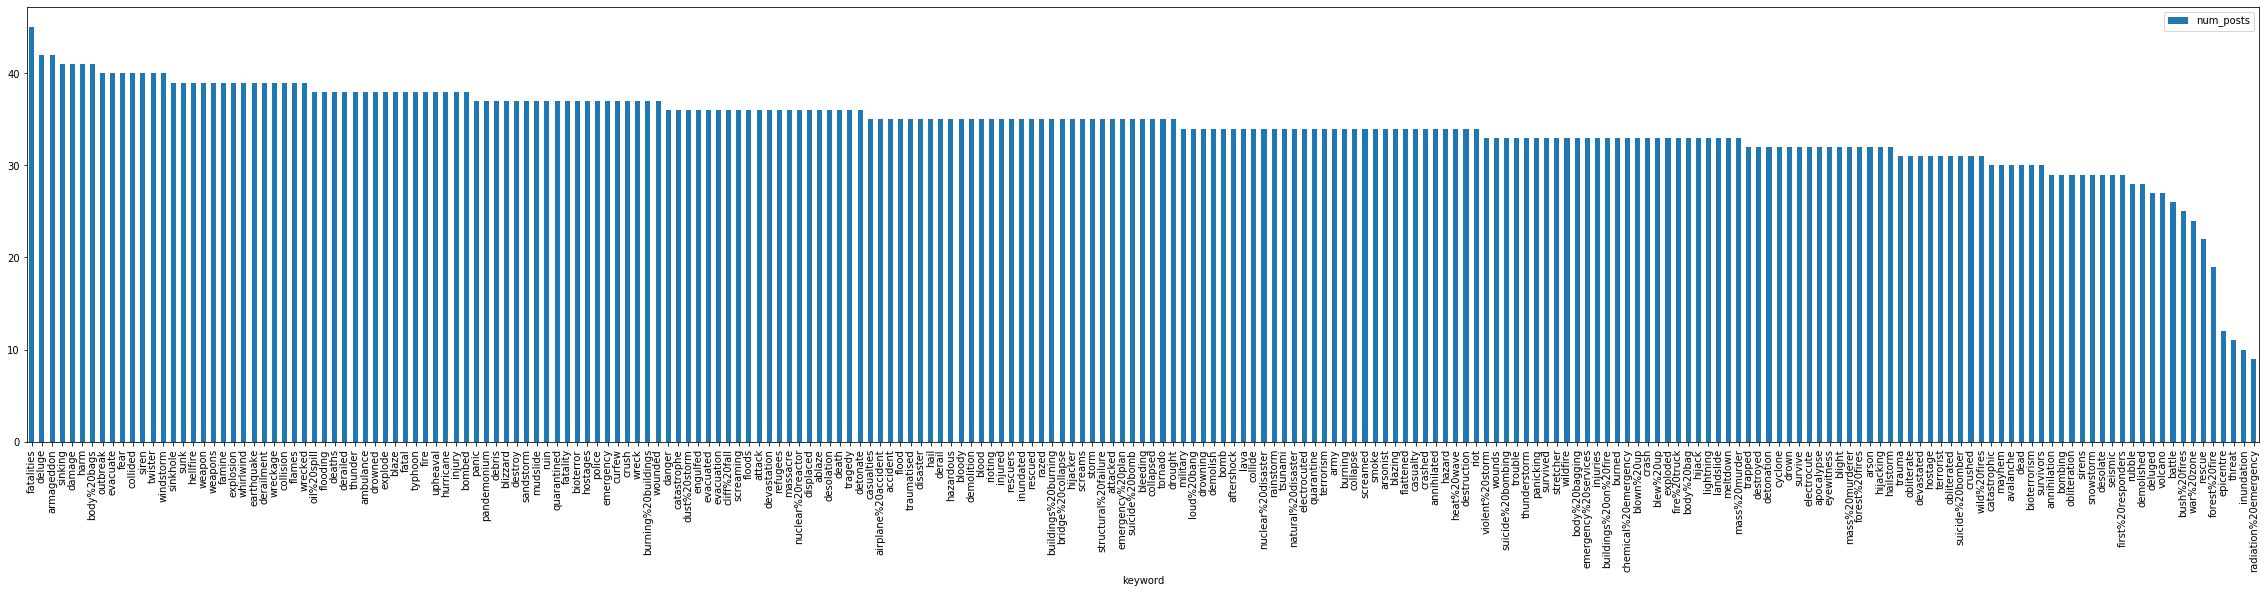

In [6]:
##We observe subcategories. Looks like most of the subcategories are mentioned equally while some are less mentioned.
cat_train = train_set.groupby('keyword').agg({'keyword':pd.Series.nunique, 'id':pd.Series.count}).rename(columns = {'keyword':'num_keywords','id':'num_posts'}).sort_values('num_posts', ascending = False)
cat_train[['num_posts']].plot(kind = 'bar', figsize = (40,8))

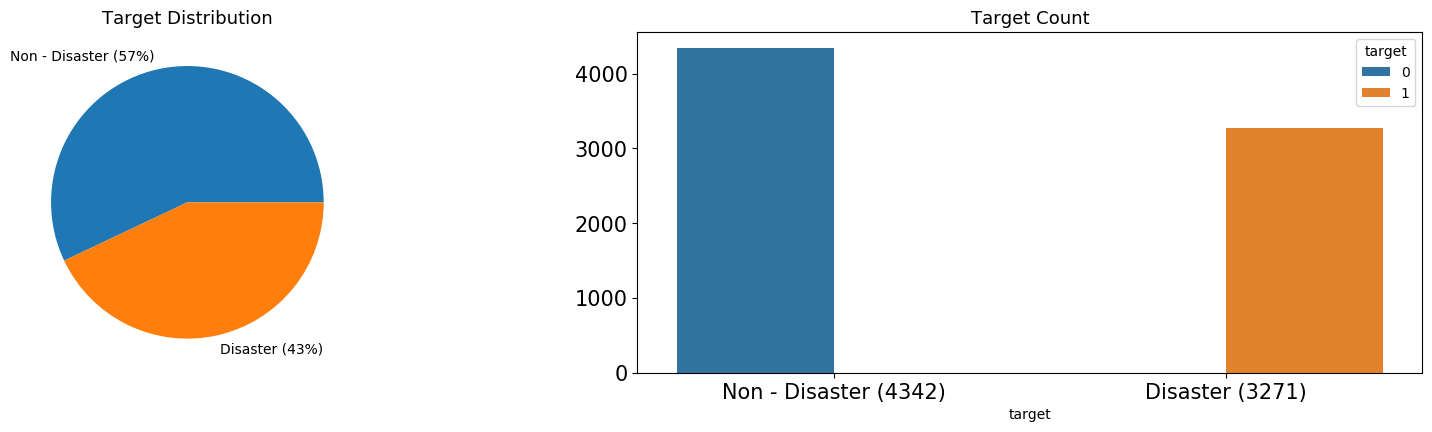

In [7]:
## How is our distribution between Disaster (1) and Non-Disaster (0) tweets?

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train_set.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Non - Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=train_set['target'], hue=train_set['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Non - Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Target Count', fontsize=13)

plt.show()

### Looks like we have more Non-Disaster tweets compared to Disaster tweets.

Text(0.5, 0.98, 'Average word length in each tweet')

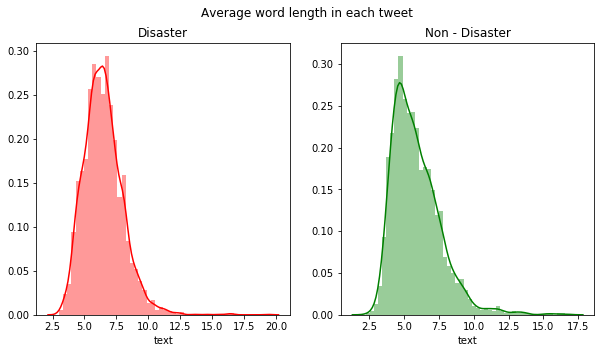

In [8]:
## How about the word count for Disaster vs. Non-Disaster?

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_set[train_set['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Disaster')
word=train_set[train_set['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non - Disaster')
fig.suptitle('Average word length in each tweet')

### Fairly similar in length

In [9]:
#function
def create_corpus(target):
    corpus=[]
    
    for x1 in train_set[train_set['target']==target]['text'].str.split():
        for i in x1:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

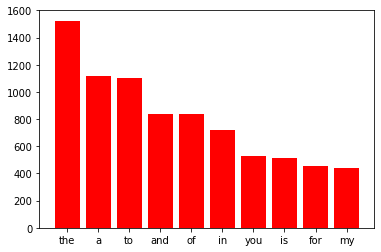

In [10]:
#Common stopwords in tweets
#Tweets with class 0
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y,color='red')

<BarContainer object of 10 artists>

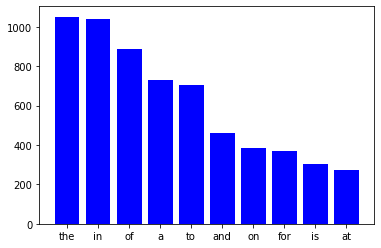

In [11]:
#Tweets with class 1
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y,color='blue')

<BarContainer object of 20 artists>

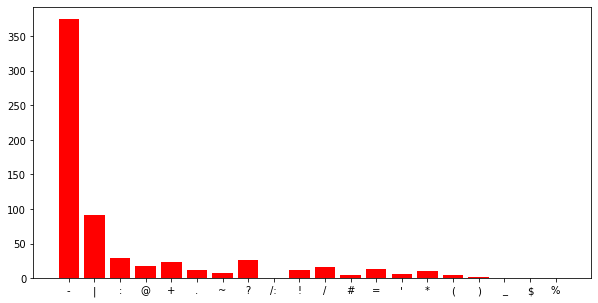

In [12]:
#Analyzing punctuations
#Class 0
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='red')

<BarContainer object of 18 artists>

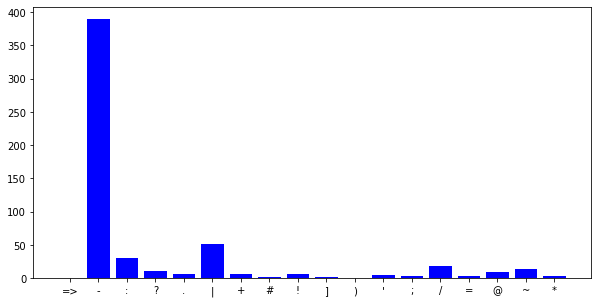

In [13]:
#Analyzing punctuations
#Class 0
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color ='blue')

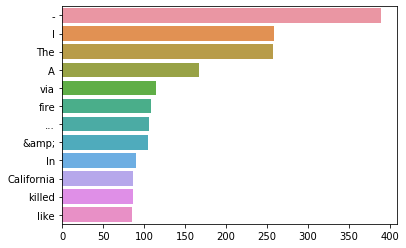

In [14]:
#Common Words
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

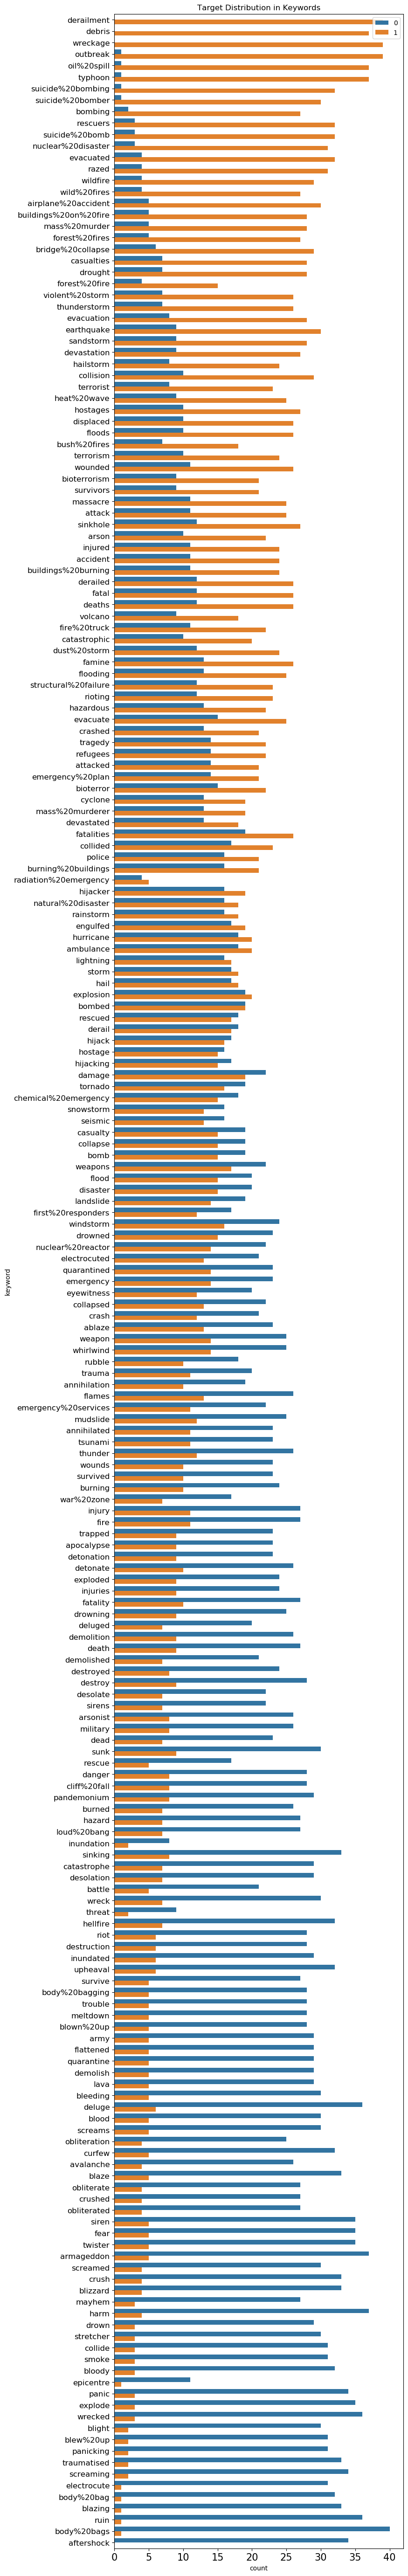

In [15]:
## What Keywords tend to be associated with Disasters (1)? What keywords are common with Non-Disasters (0)?

train_set['target_mean'] = train_set.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_set.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_set.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_set.drop(columns=['target_mean'], inplace=True)

### Very interesting! Some words like "fire" are actually more typically associated with Non-Disasters tweets than Disaster tweets.

In [16]:
train_set[['keyword','location']].isna().sum()

keyword       61
location    2533
dtype: int64

In [14]:
#nltk.download('all')


In [17]:
df=pd.concat([train_set,test],ignore_index=True)


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
df['text']=  df['text'].apply(lambda x: re.sub('https?://\S+|www\.\S+', '', x))


In [19]:
corpus =[]
for i in range(0,10876 #len(train_set['text'])
              ):
    tags=re.sub('[^a-zA-Z]',' ',df['text'][i])
    tags=tags.lower()
    tags=tags.split()
    ps=PorterStemmer()
    tags=[ps.stem(word) for word in tags if not word in set(stopwords.words('english'))]
    tags=' '.join(tags)
    corpus.append(tags)

In [20]:
#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y_train=train_set.iloc[:,4].values

In [21]:
#splitting train and test data set
X_train = X[0:7613,:]
X_test = X[7613:,:]


In [22]:
X_test.shape

(3263, 16320)

In [23]:
X_train.shape

(7613, 16320)

In [24]:
y_train.shape

(7613,)

In [25]:
#fitting naive bayes classifier to training set
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
y_pred=classifer.predict(X_test)

In [27]:
target = pd.Series(y_pred)

In [28]:
test['target']=target

In [29]:
test.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


# Model 2 with only train data for calculation of consfusion matrix

In [30]:
mod2_train = train_set

In [31]:
mod2_train['text']=  mod2_train['text'].apply(lambda x: re.sub('https?://\S+|www\.\S+', '', x))

In [32]:
mod2_corpus =[]
for i in range(0,7613 #len(train_set['text'])
              ):
    mod2_tags=re.sub('[^a-zA-Z]',' ',mod2_train['text'][i])
    mod2_tags=mod2_tags.lower()
    mod2_tags=mod2_tags.split()
    ps1=PorterStemmer()
    mod2_tags=[ps1.stem(word) for word in mod2_tags if not word in set(stopwords.words('english'))]
    mod2_tags=' '.join(mod2_tags)
    mod2_corpus.append(mod2_tags)

In [33]:
#bag of words model2
from sklearn.feature_extraction.text import CountVectorizer
cv1=CountVectorizer()
X_2=cv1.fit_transform(mod2_corpus).toarray()
y_2=mod2_train.iloc[:,4].values

In [36]:
#split for train and cross validation
from sklearn.model_selection import train_test_split
X_2train,X_2test,y_2train,y_2test = train_test_split(X_2,y_2,test_size=0.20,random_state=0)

In [37]:
#fitting naive bayes classifier to training set
from sklearn.naive_bayes import GaussianNB
classifer_mod2 = GaussianNB()
classifer_mod2.fit(X_2train,y_2train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred_mod2=classifer_mod2.predict(X_2test)

In [40]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_2test,y_pred_mod2)
cm

array([[413, 473],
       [120, 517]], dtype=int64)

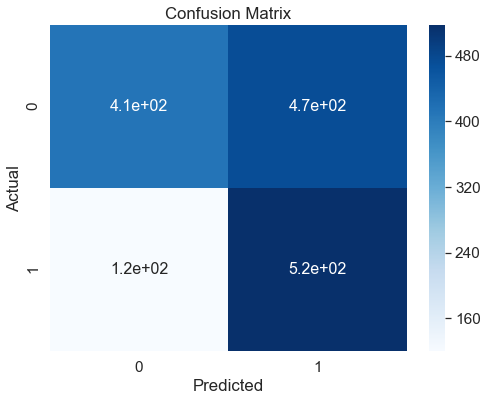

In [52]:
cm_df= pd.DataFrame(cm,columns=np.unique(y_2test),index=np.unique(y_2test))
cm_df.index.name='Actual'
cm_df.columns.name='Predicted'
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix")
cm_df.astype(int)
sns.set(font_scale=1.4)
sns.heatmap(cm_df,cmap='Blues',annot=True,annot_kws={"size":16 })
plt.show()

In [50]:
cm_df

Predicted,0,1
Actual,,
0,413,473
1,120,517


##
We see that we have achieved a very decent accuracy score from our model.
## Recommendations:
Use location specific tweets and staff more first responders to that location.